Variable naming
Each variable name, prefix__suffix, consists of two parts (separated by a double underscore) that inform you of the meaning of the variable. The prefix indicates from which of the above-listed file the variable was derived (e.g. Madden-Julian oscillation, pressure, and potential evaporation from NOAA's surface_gauss etc), the suffix indicates the specific type of information that was extracted from the file.

Variable prefixes

**contest-slp-14d**: file containing sea level pressure (slp)

**nmme0-tmp2m-34w**: file containing most recent monthly NMME model forecasts for tmp2m (cancm30,
cancm40, ccsm30, ccsm40, cfsv20, gfdlflora0, gfdlflorb0, gfdl0, nasa0,
nmme0mean) and average forecast across those models (nmme0mean)

**contest-pres-sfc-gauss-14d**: pressure

**mjo1d**: MJO phase and amplitude

**contest-pevpr-sfc-gauss-14d**: potential evaporation

**contest-wind-h850-14d**: geopotential height at 850 millibars

**contest-wind-h500-14d**: geopotential height at 500 millibars
**contest-wind-h100-14d**: geopotential height at 100 millibars

**contest-wind-h10-14d**: geopotential height at 10 millibars

**contest-wind-vwnd-925-14d**: longitudinal wind at 925 millibars

**contest-wind-vwnd-250-14d**: longitudinal wind at 250 millibars
**contest-wind-uwnd-250-14d**: zonal wind at 250 millibars

**contest-wind-uwnd-925-14d**: zonal wind at 925 millibars

**contest-rhum-sig995-14d**: relative humidity

**contest-prwtr-eatm-14d**: precipitable water for entire atmosphere
**nmme-prate-34w**: weeks 3-4 weighted average of monthly NMME model forecasts for precipitation

**nmme-prate-56w**: weeks 5-6 weighted average of monthly NMME model forecasts for precipitation
**nmme0-prate-56w**: weeks 5-6 weighted average of most recent monthly NMME model forecasts for precipitation

**nmme0-prate-34w**: weeks 3-4 weighted average of most recent monthly NMME model forecasts for precipitation

**nmme-tmp2m-34w**: weeks 3-4 weighted average of most recent monthly NMME model forecasts for target label, contest-tmp2m-14d__tmp2m

**nmme-tmp2m-56w**: weeks 5-6 weighted average of monthly NMME model forecasts for target label, contest-tmp2m-14d__tmp2m

**mei**: MEI (mei), MEI rank (rank), and Niño Index Phase (nip)

**elevation**: elevation

**contest-precip-14d**: measured precipitation

**climateregions**: Köppen-Geigerclimate classifications

Variables without prefix
Some variables do not have a prefix. Instead, each variable name in its entirely indicates the information the variable captures.

**lat**: latitude of location (anonymized)
**lon**: longitude of location (anonymized)
**startdate**: startdate of the 14 day period
**sst**: sea surface temperature
**icec**: sea ice concentration
**cancm30, cancm40, ccsm30, ccsm40, cfsv20, gfdlflora0, gfdlflorb0, gfdl0, nasa0, nmme0mean**: most recent forecasts from weather models
Target
**contest-tmp2m-14d__tmp2m**: the arithmetic mean of the max and min observed temperature over the next 14 days for each location and start date, computed as (measured max temperature + measured mini temperature) / 2

In [1]:
import pandas as pd

In [3]:
data_train = pd.read_csv('../data/train_data.csv', parse_dates=['startdate'])

In [57]:
data_test = pd.read_csv('../data/test_data.csv', parse_dates=['startdate'])

In [96]:
data_train.columns

Index(['index', 'lat', 'lon', 'startdate',
       'contest-pevpr-sfc-gauss-14d__pevpr', 'nmme0-tmp2m-34w__cancm30',
       'nmme0-tmp2m-34w__cancm40', 'nmme0-tmp2m-34w__ccsm30',
       'nmme0-tmp2m-34w__ccsm40', 'nmme0-tmp2m-34w__cfsv20',
       ...
       'wind-vwnd-925-2010-11', 'wind-vwnd-925-2010-12',
       'wind-vwnd-925-2010-13', 'wind-vwnd-925-2010-14',
       'wind-vwnd-925-2010-15', 'wind-vwnd-925-2010-16',
       'wind-vwnd-925-2010-17', 'wind-vwnd-925-2010-18',
       'wind-vwnd-925-2010-19', 'wind-vwnd-925-2010-20'],
      dtype='object', length=246)

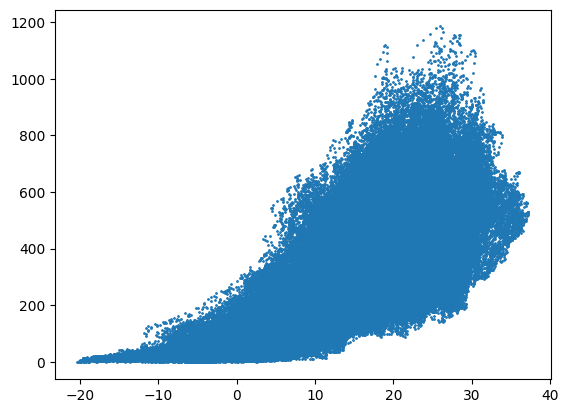

In [94]:
plt.scatter(data_train['contest-tmp2m-14d__tmp2m'], data_train['contest-pevpr-sfc-gauss-14d__pevpr'], s=1)

In [82]:
ind = (data_train.lat==1) & (data_train.lon==0.5) & (data_train.startdate.dt.dayofyear == 300)

In [83]:
ind.sum()

2

In [66]:
data_test.startdate.dt.dayofyear

0        305
1        306
2        307
3        308
4        309
        ... 
31349    361
31350    362
31351    363
31352    364
31353    365
Name: startdate, Length: 31354, dtype: int64

In [87]:
import seaborn as sns

In [88]:
sns.pairplot(data_train)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f837233d700> (for post_execute):


KeyboardInterrupt: 

In [90]:
len(data_train.columns)

246

In [5]:
data.describe()

,index,lat,lon,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,...,wind-vwnd-925-2010-11,wind-vwnd-925-2010-12,wind-vwnd-925-2010-13,wind-vwnd-925-2010-14,wind-vwnd-925-2010-15,wind-vwnd-925-2010-16,wind-vwnd-925-2010-17,wind-vwnd-925-2010-18,wind-vwnd-925-2010-19,wind-vwnd-925-2010-20
count,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000,359800.000000,375734.000000,375734.000000,375734.000000,...,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000
mean,187866.500000,0.592766,0.517964,276.744064,10.801682,12.726739,10.099323,11.638229,10.733886,11.772646,...,-1.209959,-8.109918,6.800684,19.251970,-17.697565,-9.846867,-6.231860,16.014364,10.489945,11.296334
std,108465.207359,0.251744,0.272059,198.085182,10.952417,11.073553,10.339626,10.574276,9.403434,10.689967,...,37.317333,36.201507,38.458878,25.288526,31.946748,34.164678,27.050356,25.847455,25.070435,25.113214
min,0.000000,0.000000,0.000000,-2.310000,-14.960000,-14.970000,-11.720000,-17.560000,-13.720000,-13.330000,...,-94.570000,-89.940000,-64.870000,-39.280000,-100.560000,-106.080000,-93.980000,-52.610000,-66.110000,-57.610000
25%,93933.250000,0.409091,0.300000,104.062500,1.550000,3.650000,1.640000,3.080000,3.390000,2.970000,...,-27.200000,-33.350000,-19.650000,1.960000,-40.030000,-32.170000,-20.170000,-0.360000,-6.790000,-5.570000
50%,187866.500000,0.590909,0.533333,250.320000,9.950000,11.890000,9.490000,11.600000,10.890000,11.280000,...,-3.200000,-9.390000,2.330000,20.050000,-16.710000,-8.560000,-6.030000,18.650000,11.860000,11.650000
75%,281799.750000,0.818182,0.766667,420.010000,20.230000,22.110000,18.740000,20.360000,18.330000,20.300000,...,24.940000,17.960000,28.660000,35.090000,4.390000,10.500000,11.630000,31.210000,29.040000,29.180000
max,375733.000000,1.000000,1.000000,1185.140000,36.080000,36.030000,33.390000,34.640000,35.750000,38.350000,...,113.920000,96.550000,106.420000,91.760000,56.550000,83.890000,64.850000,90.390000,76.890000,88.660000


In [11]:
import matplotlib.pyplot as plt

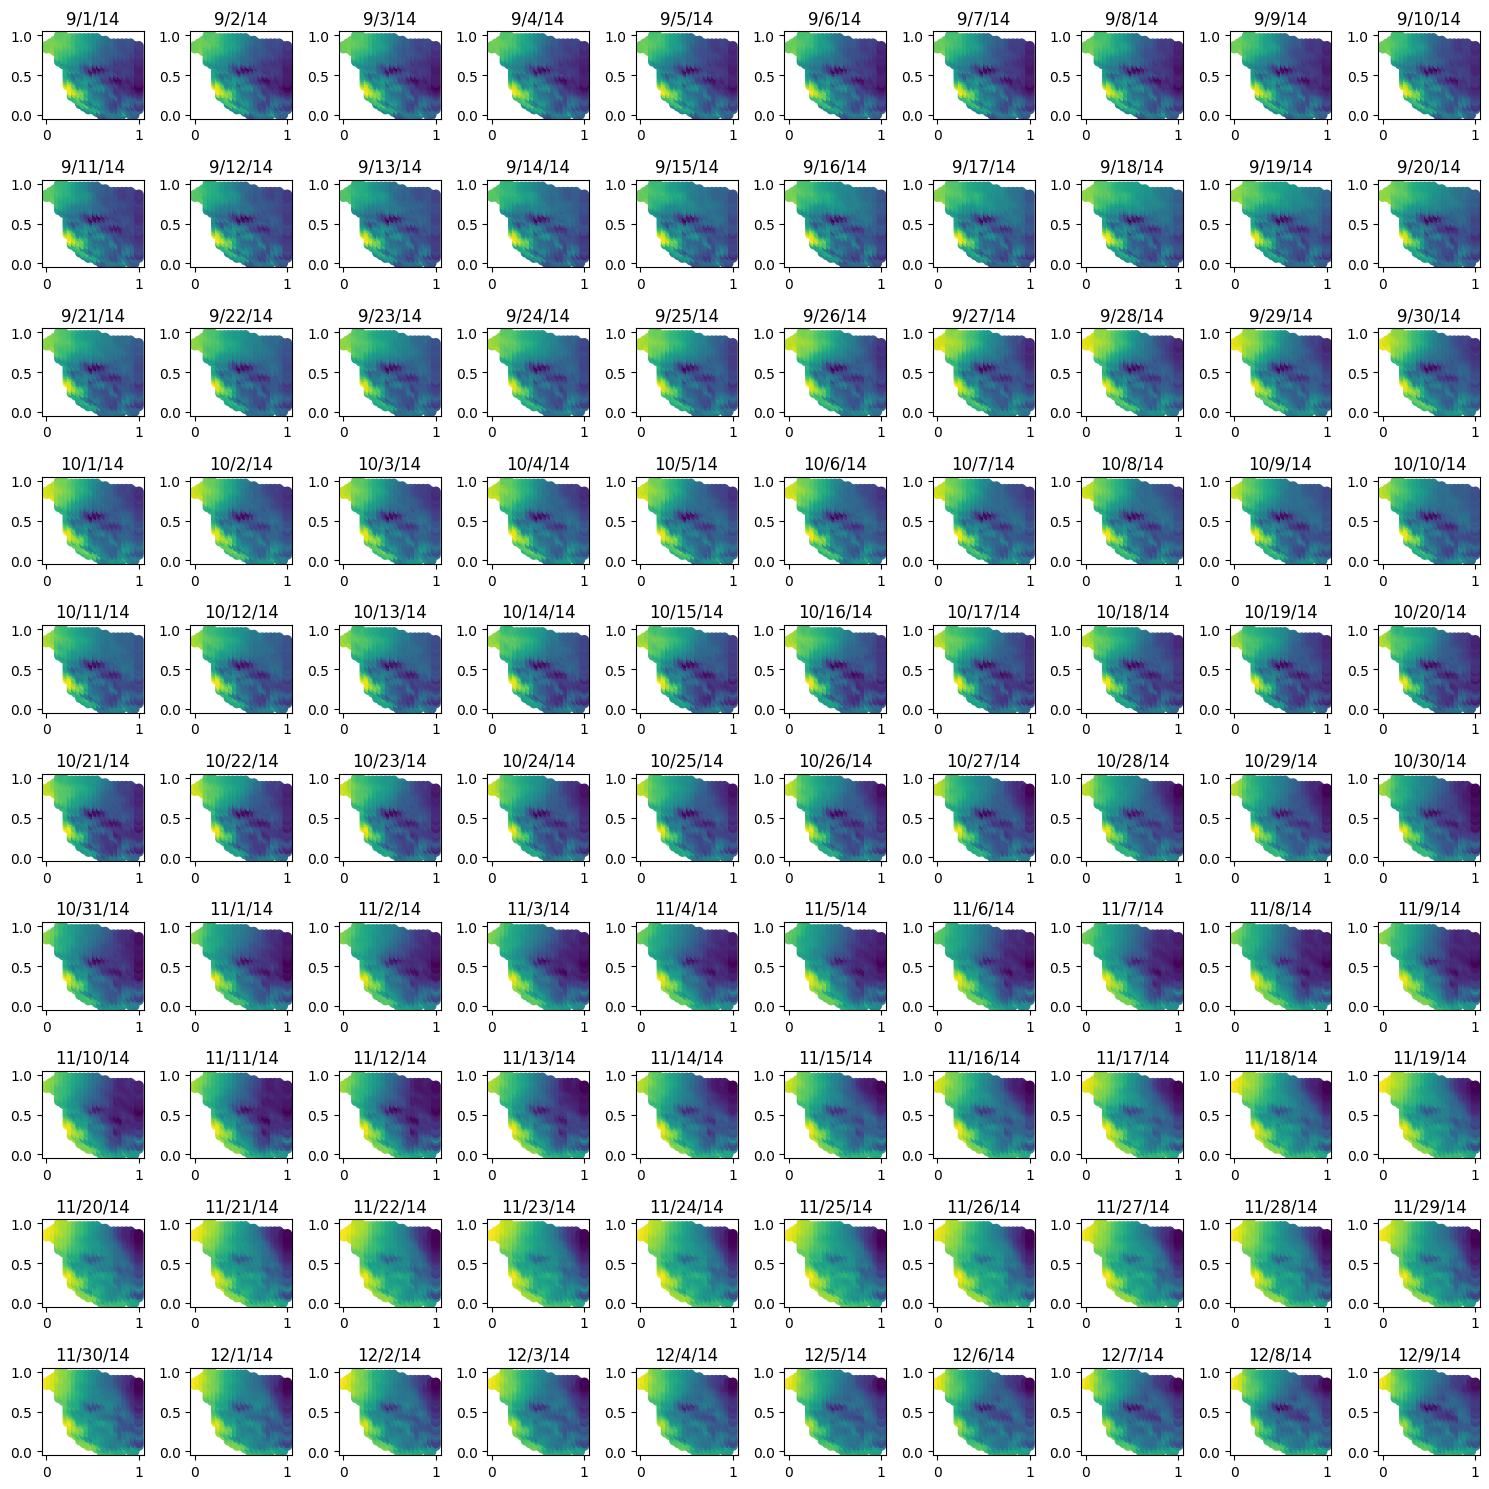

In [29]:
i = 0
fig, axes = plt.subplots(10, 10, figsize=(15, 15))
axes = axes.flatten()
for i, ax in enumerate(axes):
    ind = data['startdate'] == data['startdate'].unique()[i]
    ax.scatter(data.loc[ind, 'lat'], data.loc[ind, 'lon'], c=data.loc[ind, 'contest-tmp2m-14d__tmp2m'])
    ax.set_title(data['startdate'].unique()[i])
plt.tight_layout()

In [14]:
data.columns

Index(['index', 'lat', 'lon', 'startdate',
       'contest-pevpr-sfc-gauss-14d__pevpr', 'nmme0-tmp2m-34w__cancm30',
       'nmme0-tmp2m-34w__cancm40', 'nmme0-tmp2m-34w__ccsm30',
       'nmme0-tmp2m-34w__ccsm40', 'nmme0-tmp2m-34w__cfsv20',
       ...
       'wind-vwnd-925-2010-11', 'wind-vwnd-925-2010-12',
       'wind-vwnd-925-2010-13', 'wind-vwnd-925-2010-14',
       'wind-vwnd-925-2010-15', 'wind-vwnd-925-2010-16',
       'wind-vwnd-925-2010-17', 'wind-vwnd-925-2010-18',
       'wind-vwnd-925-2010-19', 'wind-vwnd-925-2010-20'],
      dtype='object', length=246)

In [22]:
# each startdate has 514 points 
#for j in data['startdate'].unique():
#    print((data['startdate'] == j).sum())

514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514
514


In [16]:
from sklearn.decomposition import PCA
import numpy as np
pca_1 = PCA(n_components=1)
X = np.array([[1,0,0],[0,1,0],[0,0,1]])
Xdf = pd.DataFrame(data=X,columns=['col1','col2','col3'])
test = pca_1.fit_transform(Xdf)
test
#dtrain_pca = PCA.fit(data_train)
#dt_pca = pd.DataFrame(dtrain_pca,columns = ['PC_1','PC_2','PC_3'])

array([[ 9.33560512e-18],
       [ 7.07106781e-01],
       [-7.07106781e-01]])